In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('./test_images/cr.webp')
img.shape

(900, 552, 3)

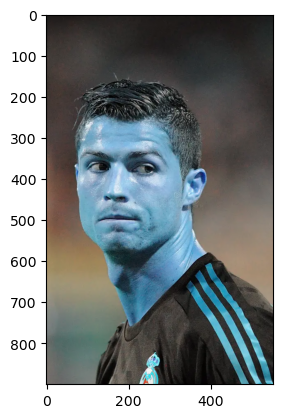

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(900, 552)

In [5]:
gray

array([[ 27,  27,  27, ...,  28,  28,  28],
       [ 27,  27,  27, ...,  28,  28,  28],
       [ 28,  28,  28, ...,  28,  28,  28],
       ...,
       [111, 110, 111, ..., 202, 209, 170],
       [111, 110, 111, ..., 199, 219, 207],
       [111, 111, 111, ..., 201, 206, 204]], dtype=uint8)

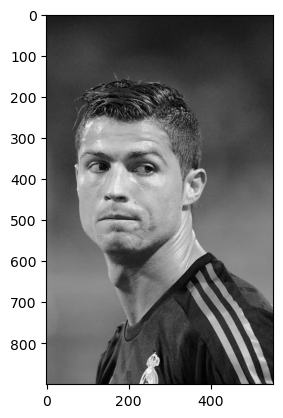

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 25, 246, 312, 312]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(25, 246, 312, 312)

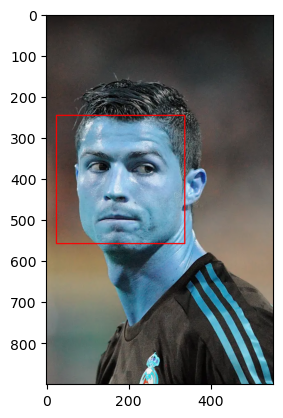

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

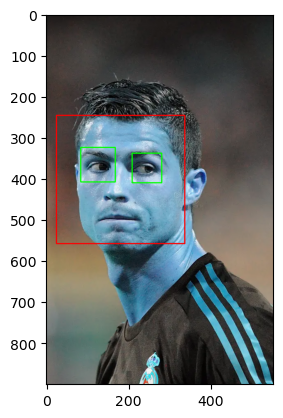

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

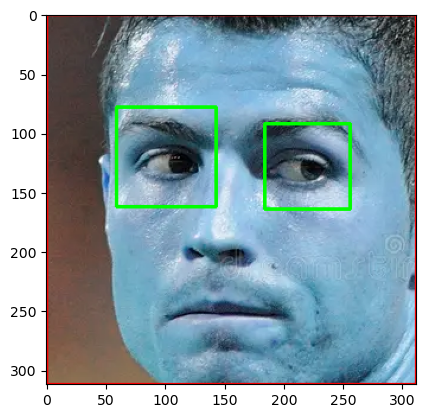

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')    #to crop the facial region of the image 

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(312, 312, 3)

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

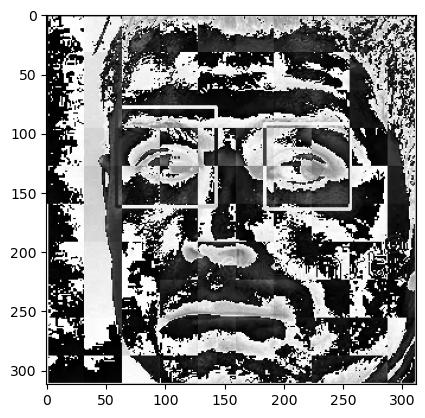

In [14]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            
            if len(eyes) >= 2:
                return roi_color
    except Exception as e:
        print("An error occurred while processing the image:", e)
        return None


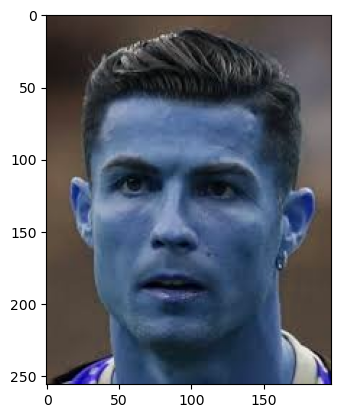

In [22]:
original_image=cv2.imread('./test_images/t1.jpg')
plt.imshow(original_image)

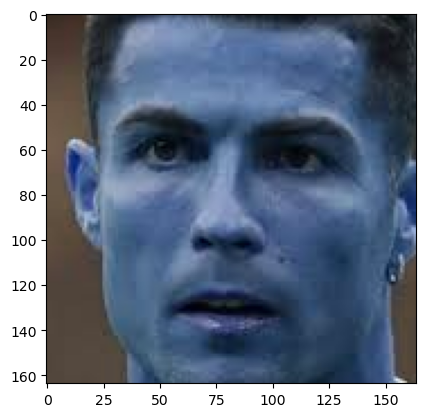

In [23]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/t1.jpg')
plt.imshow(cropped_image)

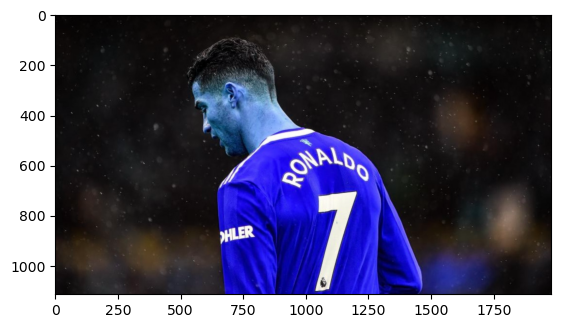

In [24]:
original_image_obstructed=cv2.imread('./test_images/t2.jpg')
plt.imshow(original_image_obstructed)

In [26]:
cropped_image_obstructed = get_cropped_image_if_2_eyes('./test_images/t2.jpg')
cropped_image_obstructed           #ici comme il n'a pas détecté les yeux alors il n'envoit rien

In [35]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [36]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)        

In [37]:
img_dirs

['./dataset/andreas_iniesta',
 './dataset/cristiano_ronaldo',
 './dataset/didier_drogba',
 './dataset/iker_casillas',
 './dataset/lionel_messi',
 './dataset/luka_modric',
 './dataset/pele',
 './dataset/roger_federer',
 './dataset/ronaldinho',
 './dataset/samuel_eto',
 './dataset/serena_williams',
 './dataset/virat_kohli',
 './dataset/zlatan_ibrahimovic']

In [38]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)     # if there is no cropped file then create it

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/andreas_iniesta
Generating cropped images in folder:  ./dataset/cropped/cristiano_ronaldo
Generating cropped images in folder:  ./dataset/cropped/didier_drogba
Generating cropped images in folder:  ./dataset/cropped/iker_casillas
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/luka_modric
Generating cropped images in folder:  ./dataset/cropped/pele
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/ronaldinho
Generating cropped images in folder:  ./dataset/cropped/samuel_eto
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Generating cropped images in folder:  ./dataset/cropped/zlatan_ibrahimovic


In [40]:
celebrity_file_names_dict   #to show all cropped photos

{'andreas_iniesta': ['./dataset/cropped/andreas_iniesta/andreas_iniesta1.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta2.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta3.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta4.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta5.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta6.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta7.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta8.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta9.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta10.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta11.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta12.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta13.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta14.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta15.png',
  './dataset/cropped/andreas_iniesta/andreas_iniesta16.png',
  './dataset/c

In [41]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'andreas_iniesta': 0,
 'cristiano_ronaldo': 1,
 'didier_drogba': 2,
 'iker_casillas': 3,
 'lionel_messi': 4,
 'luka_modric': 5,
 'pele': 6,
 'roger_federer': 7,
 'ronaldinho': 8,
 'samuel_eto': 9,
 'serena_williams': 10,
 'virat_kohli': 11,
 'zlatan_ibrahimovic': 12}

In [42]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [43]:
len(X)

655

In [44]:
len(y)

655

In [45]:
len(X[0])  #32*32*3 + 32*32

4096

In [46]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(655, 4096)

Au lieu d'effectuer manuellement chaque étape de prétraitement, de transformation et d'apprentissage séparément, nous poubvons enchaîner les étapes dans une `Pipeline`, ce qui simplifie considérablement notre code.

In [47]:
from sklearn.svm import SVC
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import StandardScaler  # pour normaliser
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6646341463414634

In [49]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.52      1.00      0.68        16
           2       0.56      0.75      0.64        12
           3       0.80      0.67      0.73        12
           4       0.86      0.50      0.63        12
           5       0.63      0.75      0.69        16
           6       0.00      0.00      0.00         4
           7       1.00      0.18      0.31        11
           8       0.50      0.67      0.57         9
           9       0.63      0.86      0.73        14
          10       1.00      0.17      0.29        12
          11       1.00      0.50      0.67         6
          12       0.65      0.68      0.67        19

    accuracy                           0.66       164
   macro avg       0.69      0.59      0.58       164
weighted avg       0.72      0.66      0.63       164



c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
pipe2 = Pipeline([('scaler', StandardScaler()), ('lor_reg', LogisticRegression(solver='liblinear', multi_class='auto', C = 10))])
pipe2.fit(X_train, y_train)
pipe2.score(X_test, y_test)

0.7621951219512195

In [54]:
print(classification_report(y_test, pipe2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       0.75      0.94      0.83        16
           2       0.62      0.83      0.71        12
           3       0.92      0.92      0.92        12
           4       1.00      0.67      0.80        12
           5       0.70      0.88      0.78        16
           6       1.00      0.75      0.86         4
           7       1.00      0.18      0.31        11
           8       0.45      0.56      0.50         9
           9       0.77      0.71      0.74        14
          10       1.00      0.25      0.40        12
          11       0.75      1.00      0.86         6
          12       0.74      0.89      0.81        19

    accuracy                           0.76       164
   macro avg       0.81      0.74      0.73       164
weighted avg       0.80      0.76      0.74       164



In [55]:
len(X_test)

164

In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=10, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.696531,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.419469,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.702571,{'logisticregression__C': 1}


In [59]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.7439024390243902

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.4573170731707317

In [62]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.774390243902439

In [64]:
lr=LogisticRegression(solver='liblinear',multi_class='auto', C=1)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6890243902439024

In [73]:
best_clf = best_estimators['svm']

In [74]:
y_pred=lr.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[19,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0, 10,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  8,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0],
       [ 1,  0,  3,  2,  1,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  1],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  2,  9,  0,  0,  0],
       [ 0,  2,  3,  0,  0,  0,  0,  0,  2,  2,  3,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  1],
       [ 0,  1,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0, 15]], dtype=int64)

In [76]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred)
cm2

array([[19,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 0,  2,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  5,  2,  0,  1,  0,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  2,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  2,  2,  1,  0,  0,  2,  1,  0,  0,  0,  2],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  4,  1,  0,  0,  1],
       [ 0,  0,  6,  0,  0,  1,  0,  0,  1,  6,  0,  0,  0],
       [ 0,  3,  3,  0,  0,  0,  1,  0,  2,  1,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0, 17]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

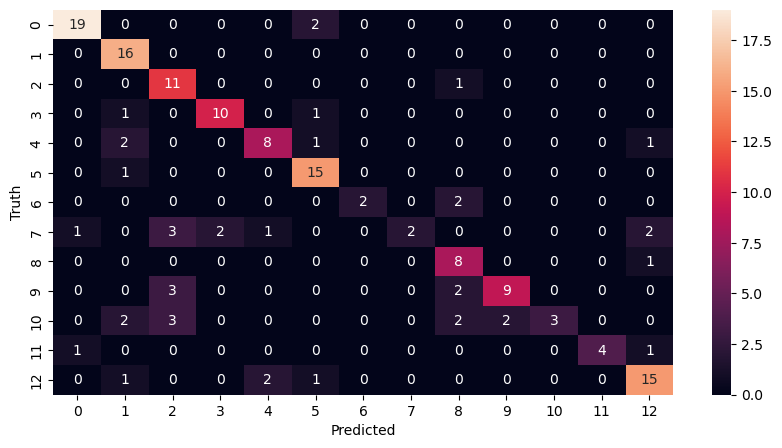

In [77]:
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, ' Truth ')

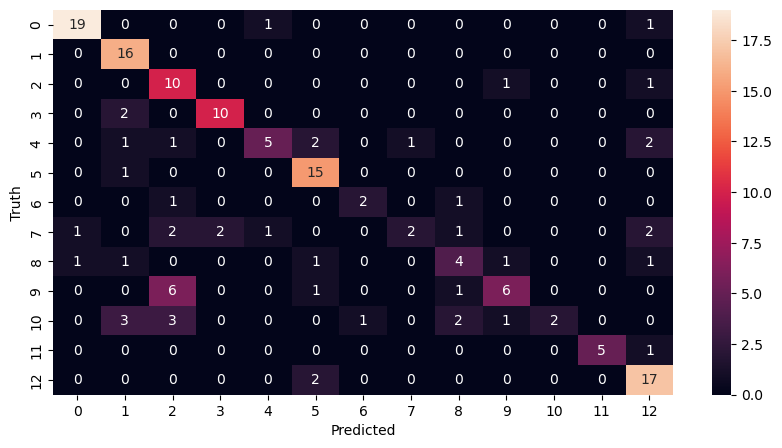

In [83]:
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel(' Truth ')

In [79]:
class_dict

{'andreas_iniesta': 0,
 'cristiano_ronaldo': 1,
 'didier_drogba': 2,
 'iker_casillas': 3,
 'lionel_messi': 4,
 'luka_modric': 5,
 'pele': 6,
 'roger_federer': 7,
 'ronaldinho': 8,
 'samuel_eto': 9,
 'serena_williams': 10,
 'virat_kohli': 11,
 'zlatan_ibrahimovic': 12}

In [80]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [81]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(lr, 'saved_model2.pkl') 

['saved_model2.pkl']

In [82]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))